In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sns.set_style(style='white')
sns.set(rc={
    'figure.figsize':(12,7),
    'axes.facecolor': 'white',
    'axes.grid': True, 'grid.color': '.9',
    'axes.linewidth': 1.0,
    'grid.linestyle': u'-'},font_scale=1.5)
custom_colors = ["#3498db", "#95a5a6","#34495e", "#2ecc71", "#e74c3c"]
sns.set_palette(custom_colors)

In [3]:
world_cup= pd.read_csv("world_cup_results.csv")
world_cup.head()

,Year,Date,Time,Round,Stadium,City,HomeTeam,HomeGoals,AwayGoals,AwayTeam,Observation
0,1930,13-Jul-30,15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,
1,1930,13-Jul-30,15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,
2,1930,14-Jul-30,12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,
3,1930,14-Jul-30,14:50,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,
4,1930,15-Jul-30,16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,


In [4]:
world_cup.shape


(852, 11)

In [5]:
world_cup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852 entries, 0 to 851
Data columns (total 11 columns):
Year           852 non-null int64
Date           852 non-null object
Time           852 non-null object
Round          852 non-null object
Stadium        852 non-null object
City           852 non-null object
HomeTeam       852 non-null object
HomeGoals      852 non-null int64
AwayGoals      852 non-null int64
AwayTeam       852 non-null object
Observation    852 non-null object
dtypes: int64(3), object(8)
memory usage: 73.3+ KB


In [6]:
world_cup["TotalMatchGoal(s)"]= world_cup["HomeGoals"] + world_cup["AwayGoals"]
world_cup.head()

,Year,Date,Time,Round,Stadium,City,HomeTeam,HomeGoals,AwayGoals,AwayTeam,Observation,TotalMatchGoal(s)
0,1930,13-Jul-30,15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,5
1,1930,13-Jul-30,15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,,3
2,1930,14-Jul-30,12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,,3
3,1930,14-Jul-30,14:50,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,,4
4,1930,15-Jul-30,16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,,1


In [7]:
world_cup.columns.values

array(['Year', 'Date', 'Time', 'Round', 'Stadium', 'City', 'HomeTeam',
       'HomeGoals', 'AwayGoals', 'AwayTeam', 'Observation',
       'TotalMatchGoal(s)'], dtype=object)

In [8]:
world_cup = world_cup[['Year', 'Date', 'Time', 'Round', 'Stadium', 'City', 'HomeTeam',
       'HomeGoals', 'AwayGoals','TotalMatchGoal(s)', 'AwayTeam', 'Observation',
       ]]
world_cup.head(2)

,Year,Date,Time,Round,Stadium,City,HomeTeam,HomeGoals,AwayGoals,TotalMatchGoal(s),AwayTeam,Observation
0,1930,13-Jul-30,15:00,Group 1,Pocitos,Montevideo,France,4,1,5,Mexico,
1,1930,13-Jul-30,15:00,Group 4,Parque Central,Montevideo,USA,3,0,3,Belgium,


In [9]:
matches_per_year= world_cup["Year"].value_counts()
matches_per_year

2014    80
2010    64
2006    64
2002    64
1998    64
1994    52
1990    52
1986    52
1982    52
1974    38
1978    38
1958    35
1970    32
1966    32
1962    32
1954    26
1950    22
1938    18
1930    18
1934    17
Name: Year, dtype: int64

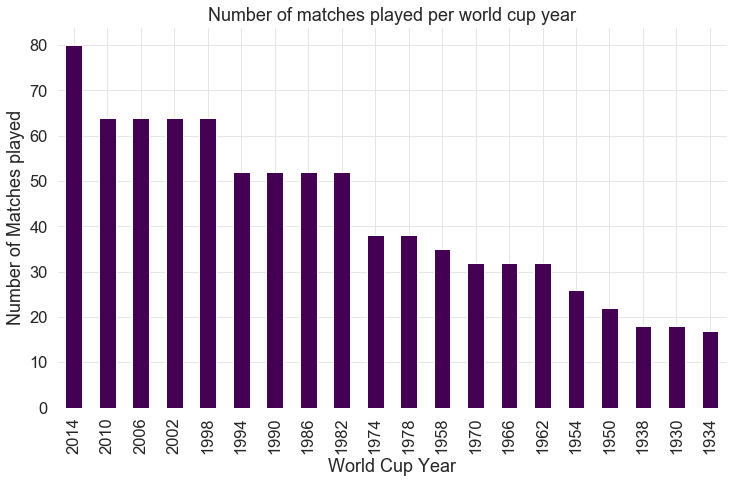

In [10]:
matches_per_year.plot(kind="bar",cmap="viridis")
plt.title("Number of matches played per world cup year")
plt.xlabel("World Cup Year")
plt.ylabel("Number of Matches played");

In [11]:
goalsscored_per_year= world_cup.groupby("Year")["TotalMatchGoal(s)"].sum()
goalsscored_per_year

Year
1930     70
1934     70
1938     84
1950     88
1954    140
1958    126
1962     89
1966     89
1970     95
1974     97
1978    102
1982    146
1986    132
1990    115
1994    141
1998    171
2002    161
2006    147
2010    145
2014    206
Name: TotalMatchGoal(s), dtype: int64

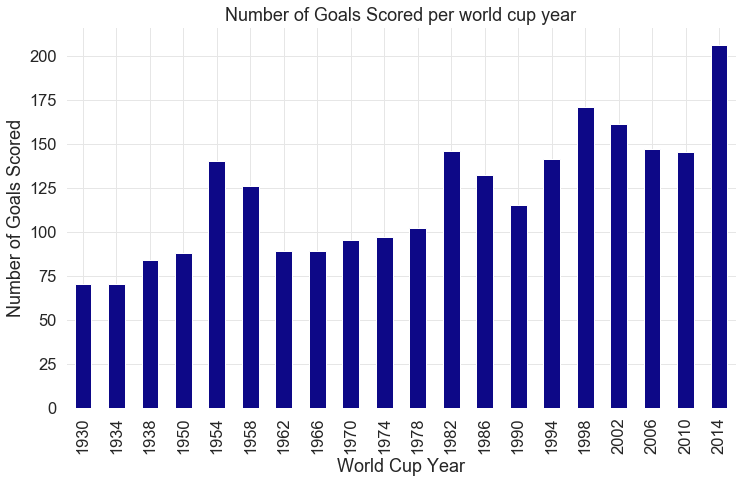

In [12]:
goalsscored_per_year.plot(kind="bar",cmap="plasma")
plt.title("Number of Goals Scored per world cup year")
plt.xlabel("World Cup Year")
plt.ylabel("Number of Goals Scored");

In [13]:
Finalists= world_cup[world_cup["Round"]=="Final"][["HomeTeam","AwayTeam"]]


In [14]:
teams_in_finals =[]
for team in Finalists["HomeTeam"]:
    teams_in_finals.append(team)
for team in Finalists["AwayTeam"]:
    teams_in_finals.append(team)    


In [15]:
from collections import Counter

In [16]:
finalist_teams_counter=dict(Counter(teams_in_finals))
sorted_finalist_teams_counter= {k: v for k, v in sorted(finalist_teams_counter.items(), key=lambda item: item[1])}

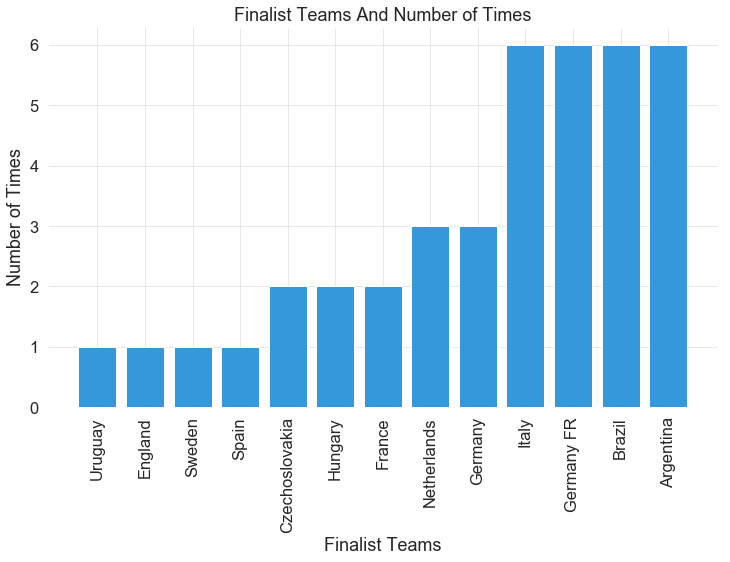

In [17]:
keys = sorted_finalist_teams_counter.keys()
values =sorted_finalist_teams_counter.values()

plt.bar(keys, values)
plt.title("Finalist Teams And Number of Times")
plt.xlabel("Finalist Teams")
plt.ylabel("Number of Times")
plt.xticks(rotation=90);

In [18]:
semi_finalists= world_cup[world_cup["Round"]=="Semi-finals"][["HomeTeam","AwayTeam"]]
teams_in_semifinals= []
for teams in semi_finalists["HomeTeam"]:
    teams_in_semifinals.append(teams)
for teams in semi_finalists["AwayTeam"]:
    teams_in_semifinals.append(teams)

Brazil            9
Germany FR        7
Italy             7
Germany           6
Argentina         5
France            5
Uruguay           4
Netherlands       4
Sweden            3
Yugoslavia        2
Austria           2
Hungary           2
England           2
Portugal          2
Czechoslovakia    2
Croatia           1
Spain             1
Poland            1
Turkey            1
USA               1
Belgium           1
Soviet Union      1
Korea Republic    1
Bulgaria          1
Chile             1
Name: Teams, dtype: int64

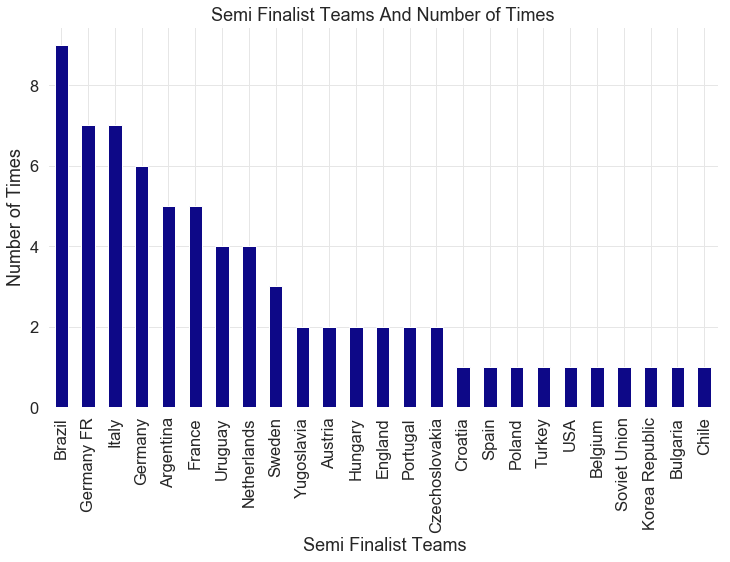

In [19]:
teams_in_semifinals=pd.DataFrame(teams_in_semifinals)
teams_in_semifinals.columns=["Teams"]
teams_in_semifinalss=teams_in_semifinals["Teams"].value_counts()
teams_in_semifinalss.plot(kind="bar",cmap="plasma")
plt.title("Semi Finalist Teams And Number of Times")
plt.xlabel(" Semi Finalist Teams")
plt.ylabel("Number of Times");
teams_in_semifinalss

In [20]:
world_cup.head(2)

,Year,Date,Time,Round,Stadium,City,HomeTeam,HomeGoals,AwayGoals,TotalMatchGoal(s),AwayTeam,Observation
0,1930,13-Jul-30,15:00,Group 1,Pocitos,Montevideo,France,4,1,5,Mexico,
1,1930,13-Jul-30,15:00,Group 4,Parque Central,Montevideo,USA,3,0,3,Belgium,


In [28]:
world_cup[world_cup["Round"]=="Semi-finals"]["TotalMatchGoal(s)"].sum()

131

In [30]:
round(world_cup[world_cup["Round"]=="Semi-finals"]["TotalMatchGoal(s)"].mean(),2)

3.64

In [31]:
world_cup[world_cup["Round"]=="Quarter-finals"]["TotalMatchGoal(s)"].sum()

180

In [36]:
round(world_cup[world_cup["Round"]=="Quarter-finals"]["TotalMatchGoal(s)"].mean(),2)

2.73

In [34]:
world_cup[world_cup["Round"]=="Final"]["TotalMatchGoal(s)"].sum()

69

In [38]:
round(world_cup[world_cup["Round"]=="Final"]["TotalMatchGoal(s)"].mean(),2)

3.45

In [49]:
world_cup["Round"].unique()

array(['Group 1', 'Group 4', 'Group 2', 'Group 3', 'Semi-finals', 'Final',
       'Preliminary round', 'Quarter-finals', 'Match for third place',
       'First round', 'Group 6', 'Group B', 'Group A', 'Group 5',
       'Group C', 'Group D', 'Group F', 'Group E', 'Round of 16',
       'Group H', 'Group G', 'Third place', 'Play-off for third place'],
      dtype=object)

In [48]:
Round=[]
for value in list(world_cup["Round"]):
    for i in value.split():
        if i.startswith(("G","R","Fir","Pr")):
            Round.append(value)
print(len(Round))


741


In [54]:
world_cup["Round"].isin(['Group 1', 'Group 4', 'Group 2', 'Group 3', 'Preliminary round', 'First round', 'Group 6', 'Group B', 
 'Group A', 'Group 5','Group C', 'Group D', 'Group F', 'Group E', 'Round of 16','Group H', 'Group G' ]).sum()

711